<a href="https://colab.research.google.com/github/KajalMishra-29/GHG_Emission_Prediction/blob/main/GHG_Emission_Prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Import Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Step 2: Load Dataset

In [3]:
excel_file = 'SupplyChainEmissionFactorsforUSIndustriesCommodities.xlsx'
years = range(2010, 2017)

In [4]:
df_1 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Commodity')
df_1.head()

,Commodity Code,Commodity Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1


In [5]:
df_2 = pd.read_excel(excel_file, sheet_name=f'{years[0]}_Detail_Industry')
df_2.head()

,Industry Code,Industry Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins
0,1111A0,Oilseed farming,carbon dioxide,"kg/2018 USD, purchaser price",0.414,0.073,0.487,NaN,4,3,1,4,1
1,1111A0,Oilseed farming,methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1
2,1111A0,Oilseed farming,nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1
3,1111A0,Oilseed farming,other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1
4,1111B0,Grain farming,carbon dioxide,"kg/2018 USD, purchaser price",0.680,0.082,0.762,NaN,4,3,1,4,1


In [6]:
all_data = []
for year in years:
  try:
    df_comm = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Commodity')
    df_ind = pd.read_excel(excel_file, sheet_name=f'{year}_Detail_Industry')

    df_comm['Source'] = 'Commodity'
    df_ind['Source'] = 'Industry'
    df_comm['Year'] = df_ind['Year'] = year

    df_comm.columns = df_comm.columns.str.strip()
    df_ind.columns = df_ind.columns.str.strip()

    df_comm.rename(columns = {
        'Commodity Code':'Code',
        'Commodity Name':'Name',
    }, inplace=True)

    df_ind.rename(columns = {
        'Industry Code':'Code',
        'Industry Name':'Name',
    }, inplace=True)

    all_data.append(pd.concat([df_comm, df_ind], ignore_index=True))

  except Exception as e:
    print(f"Error processing year {year}: {e}")

In [7]:
all_data[0]

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3151,813B00,"Civic, social, professional, and similar organ...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.006,0.000,0.006,NaN,4,3,1,5,1,Industry,2010
3152,814000,Private households,carbon dioxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2010
3153,814000,Private households,methane,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2010
3154,814000,Private households,nitrous oxide,"kg/2018 USD, purchaser price",0.000,0.000,0.000,NaN,4,3,1,5,1,Industry,2010


In [8]:
len(all_data)

7

In [9]:
df = pd.concat(all_data, ignore_index=True)
df.head()

,Code,Name,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Unnamed: 7,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source,Year
0,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",carbon dioxide,"kg/2018 USD, purchaser price",0.398,0.073,0.470,NaN,4,3,1,4,1,Commodity,2010
1,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",methane,"kg/2018 USD, purchaser price",0.001,0.001,0.002,NaN,4,3,1,1,1,Commodity,2010
2,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",nitrous oxide,"kg/2018 USD, purchaser price",0.002,0.000,0.002,NaN,4,3,1,4,1,Commodity,2010
3,1111A0,"Fresh soybeans, canola, flaxseeds, and other o...",other GHGs,"kg CO2e/2018 USD, purchaser price",0.002,0.000,0.002,NaN,3,3,1,3,1,Commodity,2010
4,1111B0,"Fresh wheat, corn, rice, and other grains",carbon dioxide,"kg/2018 USD, purchaser price",0.659,0.081,0.740,NaN,4,3,1,4,1,Commodity,2010


In [10]:
df.shape

(22092, 15)

# Step 3: Data Preprocessing

In [11]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins', 'Unnamed: 7',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [12]:
df.isnull().sum()

,0
Code,0
Name,0
Substance,0
Unit,0
Supply Chain Emission Factors without Margins,0
Margins of Supply Chain Emission Factors,0
Supply Chain Emission Factors with Margins,0
Unnamed: 7,22092
DQ ReliabilityScore of Factors without Margins,0
DQ TemporalCorrelation of Factors without Margins,0


<Axes: >

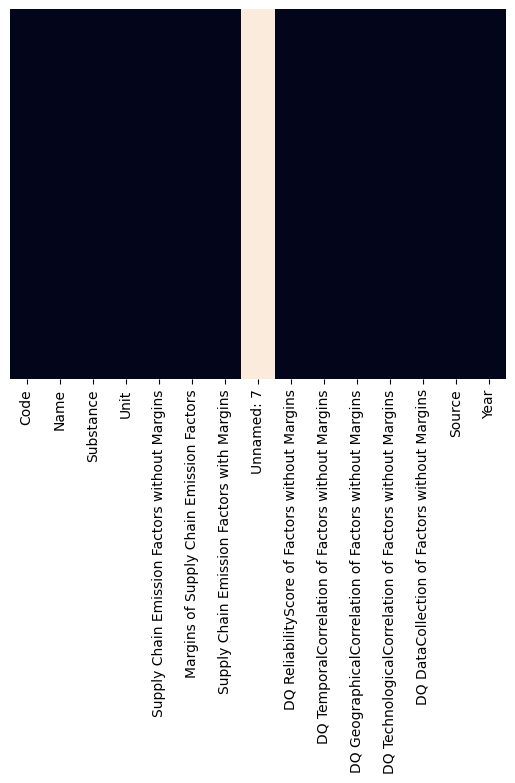

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

In [14]:
# As there is no data available in unnamed column so we will drop the column
df.drop(columns={'Unnamed: 7'}, inplace=True)

In [15]:
df.columns

Index(['Code', 'Name', 'Substance', 'Unit',
       'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source', 'Year'],
      dtype='object')

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  object 
 3   Unit                                                    22092 non-null  object 
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.0,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.0,0.000,0.000,3.349
Supply Chain Emission Factors with Margins,22092.0,0.097681,0.288992,0.0,0.0,0.003,0.052,7.290
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.0,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.0,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.0,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.0,1.000,1.000,1.000
Year,22092.0,2013.000000,2.000045,2010.0,2011.0,2013.000,2015.000,2016.000


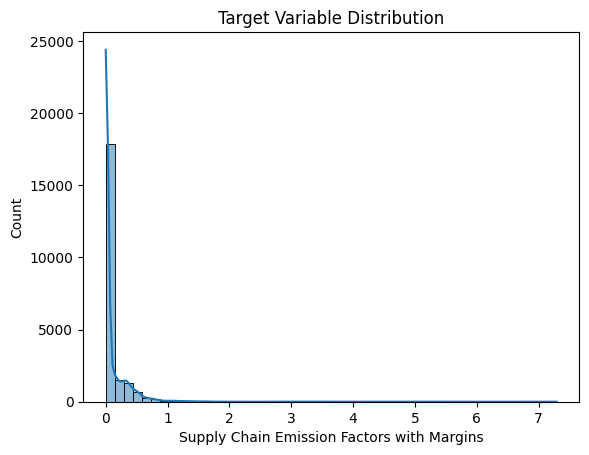

In [18]:
# Visualization distribution
sns.histplot(df['Supply Chain Emission Factors with Margins'], bins=50, kde=True)
plt.title('Target Variable Distribution')
plt.show()

In [19]:
# Check categorical variables
print(df['Substance'].value_counts())

Substance
carbon dioxide    5523
methane           5523
nitrous oxide     5523
other GHGs        5523
Name: count, dtype: int64


In [20]:
# checking unique values in 'Unit' with count
print(df['Unit'].value_counts())

Unit
kg/2018 USD, purchaser price         16569
kg CO2e/2018 USD, purchaser price     5523
Name: count, dtype: int64


In [21]:
# checking unique values in 'Unit'
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [22]:
# checking unique values in 'Source' with count
print(df['Source'].value_counts())

Source
Industry     11060
Commodity    11032
Name: count, dtype: int64


In [23]:
# checking unique values in 'Substances'
print(df['Substance'].unique())

['carbon dioxide' 'methane' 'nitrous oxide' 'other GHGs']


In [24]:
# mapping substances
substance_map = {'carbon dioxide':0, 'methane':1, 'nitrous oxide':2, 'other GHGs':3}
df['Substance'] = df['Substance'].map(substance_map)

In [25]:
# checking unique values in substances
print(df['Substance'].unique())

[0 1 2 3]


In [26]:
print(df['Unit'].unique())

['kg/2018 USD, purchaser price' 'kg CO2e/2018 USD, purchaser price']


In [27]:
unit_map = {'kg/2018 USD, purchaser price':0, 'kg CO2e/2018 USD, purchaser price':1}
df['Unit'] = df['Unit'].map(unit_map)
print(df['Unit'].unique())

[0 1]


In [28]:
print(df['Source'].unique())

['Commodity' 'Industry']


In [29]:
source_map = {'Commodity':0, 'Industry':1}
df['Source'] = df['Source'].map(source_map)
print(df['Source'].unique())

[0 1]


In [30]:
# checking data types and non null values after mapping
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Code                                                    22092 non-null  object 
 1   Name                                                    22092 non-null  object 
 2   Substance                                               22092 non-null  int64  
 3   Unit                                                    22092 non-null  int64  
 4   Supply Chain Emission Factors without Margins           22092 non-null  float64
 5   Margins of Supply Chain Emission Factors                22092 non-null  float64
 6   Supply Chain Emission Factors with Margins              22092 non-null  float64
 7   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 8   DQ TemporalCorrelation of Factors wi

In [31]:
df.Code.unique()

array(['1111A0', '1111B0', '111200', '111300', '111400', '111900',
       '112120', '1121A0', '112300', '112A00', '113000', '114000',
       '115000', '211000', '212100', '212230', '2122A0', '212310',
       '2123A0', '213111', '21311A', '221100', '221200', '221300',
       '230301', '230302', '233210', '233230', '233240', '233262',
       '2332A0', '2332C0', '2332D0', '233411', '233412', '2334A0',
       '311111', '311119', '311210', '311221', '311224', '311225',
       '311230', '311300', '311410', '311420', '311513', '311514',
       '31151A', '311520', '311615', '31161A', '311700', '311810',
       '3118A0', '311910', '311920', '311930', '311940', '311990',
       '312110', '312120', '312130', '312140', '312200', '313100',
       '313200', '313300', '314110', '314120', '314900', '315000',
       '316000', '321100', '321200', '321910', '3219A0', '322110',
       '322120', '322130', '322210', '322220', '322230', '322291',
       '322299', '323110', '323120', '324110', '324121', '3241

In [32]:
df.Name.unique()

array(['Fresh soybeans, canola, flaxseeds, and other oilseeds',
       'Fresh wheat, corn, rice, and other grains',
       'Fresh vegetables, melons, and potatoes',
       'Fresh fruits and tree nuts',
       'Greenhouse crops, mushrooms, nurseries, and flowers',
       'Tobacco, cotton, sugarcane, peanuts, sugar beets, herbs and spices, and other crops',
       'Dairies', 'Cattle ranches and feedlots', 'Poultry farms',
       'Animal farms and aquaculture ponds (except cattle and poultry)',
       'Timber and raw forest products', 'Wild-caught fish and game',
       'Agriculture and forestry support', 'Unrefined oil and gas',
       'Coal', 'Copper, nickel, lead, and zinc',
       'Iron, gold, silver, and other metal ores', 'Dimensional stone',
       'Sand, gravel, clay, phosphate, other nonmetallic minerals',
       'Well drilling', 'Other support activities for mining',
       'Electricity', 'Natural gas',
       'Drinking water and wastewater treatment',
       'Nonresidential mai

In [33]:
len(df.Name.unique())

713

### Top 10 Emitting Industry

In [34]:
top_emitters = df[['Name', 'Supply Chain Emission Factors with Margins']].groupby('Name').mean().sort_values(
    'Supply Chain Emission Factors with Margins', ascending=False).head(10)
# reset index for better plotting
top_emitters = top_emitters.reset_index()

In [35]:
top_emitters

,Name,Supply Chain Emission Factors with Margins
0,Cement manufacturing,1.686179
1,Cement,1.324964
2,"Electric power generation, transmission, and d...",1.220357
3,Electricity,1.016143
4,"Dolls, toys, and games",0.832179
5,Lime and gypsum products,0.816536
6,Lime and gypsum product manufacturing,0.799679
7,Industrial gas manufacturing,0.612929
8,Compressed Gases,0.539679
9,Clothing,0.468714


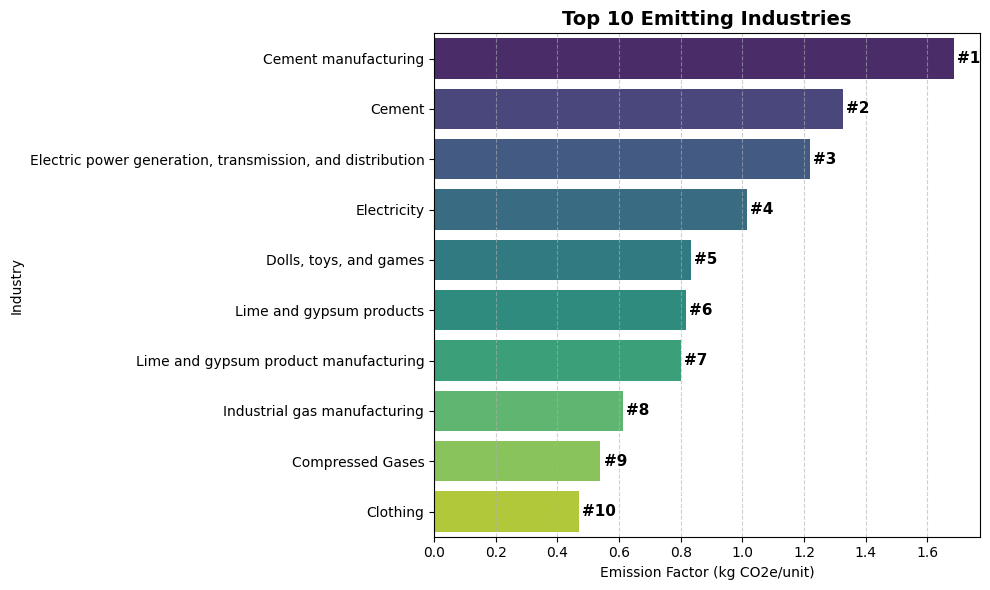

In [36]:
# Plotting the top 10 indestries
plt.figure(figsize=(10,6))
sns.barplot(
    x='Supply Chain Emission Factors with Margins',
    y='Name',
    data = top_emitters,
    hue='Name',
    palette='viridis'
)
# add ranking labels (1,2,3,4...) next to bars
for i, (value, name) in enumerate(zip(top_emitters['Supply Chain Emission Factors with Margins'], top_emitters.index), start=1):
  plt.text(value + 0.01, i-1, f'#{i}', va='center', fontsize=11, fontweight='bold', color='black')

plt.title('Top 10 Emitting Industries', fontsize=14, fontweight='bold')
plt.xlabel('Emission Factor (kg CO2e/unit)')
plt.ylabel('Industry')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

Drop non-numeric columns not needed     
Also drop code and year columns since there is no need of both the columns


In [37]:
df.drop(columns=['Name','Code','Year'], inplace=True)

In [38]:
df.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,0.47,4,3,1,4,1,0


In [39]:
df.shape

(22092, 11)

Define Feature and Target

In [40]:
X = df.drop(columns=['Supply Chain Emission Factors with Margins']) # feature set excluding the target variable
y = df['Supply Chain Emission Factors with Margins'] # Target variable

In [41]:
X.head(1)

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
0,0,0,0.398,0.073,4,3,1,4,1,0


In [42]:
y.head()

,Supply Chain Emission Factors with Margins
0,0.470
1,0.002
2,0.002
3,0.002
4,0.740


### Univarient Analysis

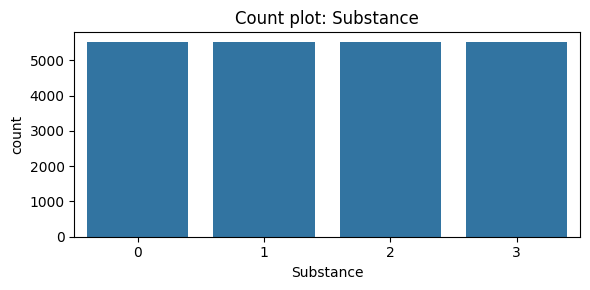

In [43]:
# Count plot for substances
plt.figure(figsize=(6,3))
sns.countplot(x=df['Substance'])
plt.title('Count plot: Substance')
plt.xticks()
plt.tight_layout()
plt.show()

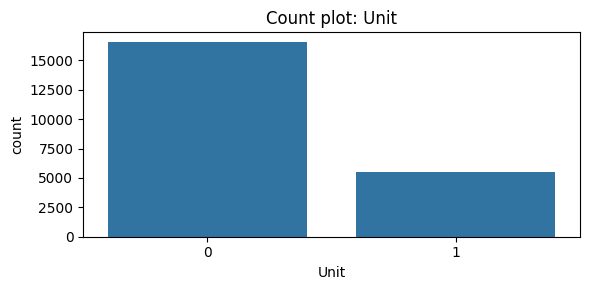

In [44]:
# Count plot for unit
plt.figure(figsize=(6,3))
sns.countplot(x=df['Unit'])
plt.title('Count plot: Unit')
plt.tight_layout()
plt.show()

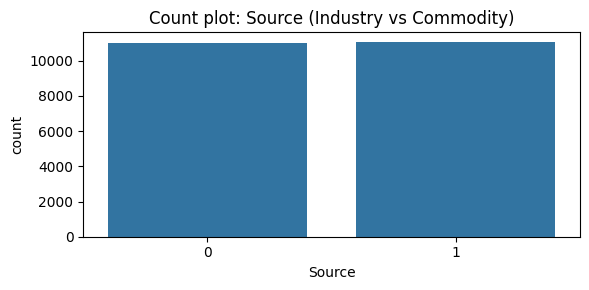

In [45]:
# Count plot for Source
plt.figure(figsize=(6,3))
sns.countplot(x=df['Source'])
plt.title('Count plot: Source (Industry vs Commodity)')
plt.tight_layout()
plt.show()

In [46]:
df.columns

Index(['Substance', 'Unit', 'Supply Chain Emission Factors without Margins',
       'Margins of Supply Chain Emission Factors',
       'Supply Chain Emission Factors with Margins',
       'DQ ReliabilityScore of Factors without Margins',
       'DQ TemporalCorrelation of Factors without Margins',
       'DQ GeographicalCorrelation of Factors without Margins',
       'DQ TechnologicalCorrelation of Factors without Margins',
       'DQ DataCollection of Factors without Margins', 'Source'],
      dtype='object')

### Multivarient Analysis

Correlation heatmap

In [47]:
df.select_dtypes(include=np.number).corr() # checking correlation between numerical features

,Substance,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,DQ ReliabilityScore of Factors without Margins,DQ TemporalCorrelation of Factors without Margins,DQ GeographicalCorrelation of Factors without Margins,DQ TechnologicalCorrelation of Factors without Margins,DQ DataCollection of Factors without Margins,Source
Substance,1.000000e+00,7.745967e-01,-0.391851,-0.218400,-0.421603,0.095092,-3.667637e-15,NaN,0.198415,NaN,4.273306e-16
Unit,7.745967e-01,1.000000e+00,-0.155859,-0.094300,-0.169741,-0.025159,-3.173071e-17,NaN,0.286990,NaN,-1.545892e-17
Supply Chain Emission Factors without Margins,-3.918505e-01,-1.558594e-01,1.000000,0.143005,0.962971,-0.098000,9.283870e-03,NaN,0.148410,NaN,2.713112e-02
Margins of Supply Chain Emission Factors,-2.184002e-01,-9.429989e-02,0.143005,1.000000,0.404541,-0.069598,7.953109e-03,NaN,0.086335,NaN,-6.750426e-02
Supply Chain Emission Factors with Margins,-4.216032e-01,-1.697410e-01,0.962971,0.404541,1.000000,-0.109494,1.074848e-02,NaN,0.160574,NaN,6.687828e-03
DQ ReliabilityScore of Factors without Margins,9.509190e-02,-2.515938e-02,-0.098000,-0.069598,-0.109494,1.000000,-2.170715e-02,NaN,0.073583,NaN,-1.228726e-02
DQ TemporalCorrelation of Factors without Margins,-3.667637e-15,-3.173071e-17,0.009284,0.007953,0.010748,-0.021707,1.000000e+00,NaN,-0.030607,NaN,-2.909814e-15
DQ GeographicalCorrelation of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DQ TechnologicalCorrelation of Factors without Margins,1.984154e-01,2.869901e-01,0.148410,0.086335,0.160574,0.073583,-3.060675e-02,NaN,1.000000,NaN,2.827202e-02
DQ DataCollection of Factors without Margins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
df.info() # checking data types and non-null counts after mapping

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22092 entries, 0 to 22091
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Substance                                               22092 non-null  int64  
 1   Unit                                                    22092 non-null  int64  
 2   Supply Chain Emission Factors without Margins           22092 non-null  float64
 3   Margins of Supply Chain Emission Factors                22092 non-null  float64
 4   Supply Chain Emission Factors with Margins              22092 non-null  float64
 5   DQ ReliabilityScore of Factors without Margins          22092 non-null  int64  
 6   DQ TemporalCorrelation of Factors without Margins       22092 non-null  int64  
 7   DQ GeographicalCorrelation of Factors without Margins   22092 non-null  int64  
 8   DQ TechnologicalCorrelation of Facto

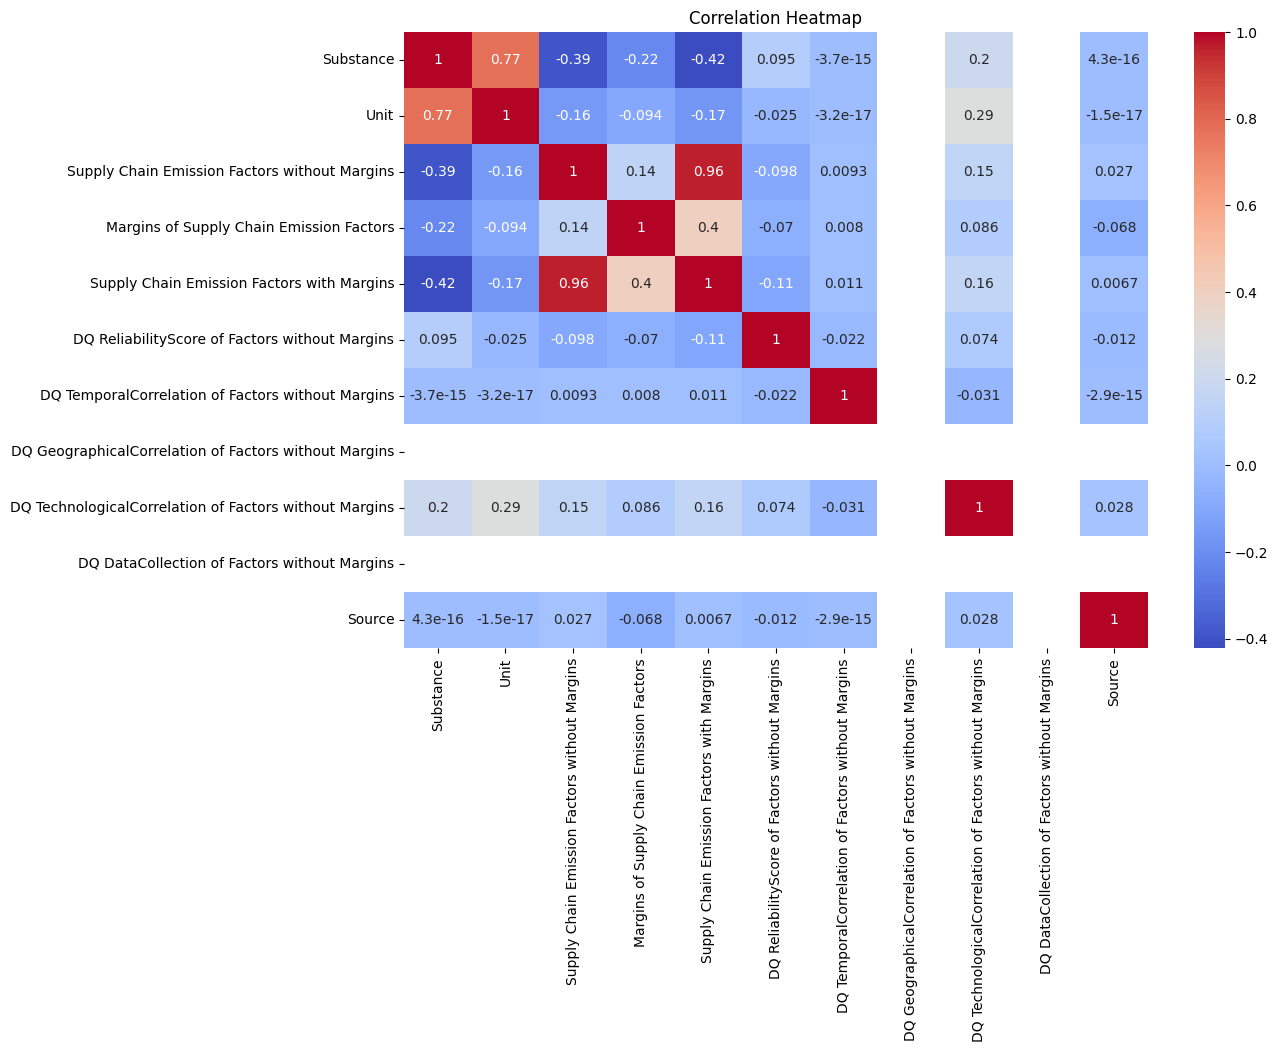

In [49]:
# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [50]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Substance,22092.0,1.500000,1.118059,0.0,0.75,1.500,2.250,3.000
Unit,22092.0,0.250000,0.433023,0.0,0.00,0.000,0.250,1.000
Supply Chain Emission Factors without Margins,22092.0,0.084807,0.267039,0.0,0.00,0.002,0.044,7.228
Margins of Supply Chain Emission Factors,22092.0,0.012857,0.078720,0.0,0.00,0.000,0.000,3.349
DQ ReliabilityScore of Factors without Margins,22092.0,3.308030,0.499643,2.0,3.00,3.000,4.000,4.000
DQ TemporalCorrelation of Factors without Margins,22092.0,2.571429,0.494883,2.0,2.00,3.000,3.000,3.000
DQ GeographicalCorrelation of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
DQ TechnologicalCorrelation of Factors without Margins,22092.0,2.632129,1.135661,1.0,1.00,3.000,3.000,5.000
DQ DataCollection of Factors without Margins,22092.0,1.000000,0.000000,1.0,1.00,1.000,1.000,1.000
Source,22092.0,0.500634,0.500011,0.0,0.00,1.000,1.000,1.000


## Normalize features


In [51]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
X_scaled[0].min(), X_scaled[0].max()

(np.float64(-1.3416407864998738), np.float64(1.3849614361966767))

In [53]:
np.round(X_scaled.mean()), np.round(X_scaled.std())

(np.float64(-0.0), np.float64(1.0))

Divide the data into train and test

In [54]:
X.shape

(22092, 10)

In [55]:
# splitting data into train test
X_train, X_test , y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [56]:
X_train.shape, X_test.shape

((17673, 10), (4419, 10))

Select model for training

In [57]:
RF_model = RandomForestRegressor(random_state=42)

# Step 4: Training


In [58]:
RF_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Step 5: Prediction and evaluation

In [59]:
RF_y_pred = RF_model.predict(X_test)

In [60]:
RF_y_pred[:20]

array([2.93080000e-01, 1.00000000e-03, 1.21122793e-03, 1.16130018e-03,
       0.00000000e+00, 4.00000000e-03, 1.24555977e-04, 2.20009044e-03,
       2.00000000e-03, 3.94080000e-01, 0.00000000e+00, 1.40000000e-02,
       4.08395607e-03, 7.00000000e-03, 2.15970231e-03, 2.89160331e-04,
       1.02821706e-03, 3.15790000e-01, 9.00000000e-03, 0.00000000e+00])

In [61]:
RF_mse = mean_squared_error(y_test, RF_y_pred) # Calculating Mean squared error (MSE)
RF_rmse = np.sqrt(RF_mse) # calculating root mean sqyared error (RMSE)
# calculating R^2 score
RF_r2 = r2_score(y_test, RF_y_pred)

print(f'Root Mean Squared Error: {RF_rmse}')
print(f'R^2 Score: {RF_r2}')

Root Mean Squared Error: 0.006143789217304181
R^2 Score: 0.9993280085696331


In [62]:
from sklearn.linear_model import LinearRegression # importing Linear regression model
LR_model = LinearRegression() # Initializing Linear Regression model

# fitting the linear regression model on training data
LR_model.fit(X_train, y_train)
LR_y_pred = LR_model.predict(X_test) # making predictions on test data

LR_mse = mean_squared_error(y_test, LR_y_pred) # calculating mean squared error (MSE)
LR_rmse = np.sqrt(LR_mse) # calculating Root mean squared error
LR_r2 = r2_score(y_test, LR_y_pred) # calculating R^2 score

print(f'Root Mean Squared Error: {LR_rmse}')
print(f'R^2 Score: {LR_r2}')

Root Mean Squared Error: 0.00028073792916293185
R^2 Score: 0.9999985968848819


# Step 6: Hyperparameter Tuning

In [63]:
# Hyperparameter tuning for Random Forest Regressor using GridSearchCV
# Define the parameter grid for hyperparamenter tuning
param_grid = {
    'n_estimators': [100,200],
    'max_depth': [None, 10,20],
    'min_samples_split': [2,5]
}

# perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, n_jobs=-1)

# Fit the grid search model on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by the grid search
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


Use best parameters for Prediction

In [65]:
# use the best model to make predictions on test set
y_pred_best = best_model.predict(X_test)

HP_mse = mean_squared_error(y_test, y_pred_best)
HP_rmse = np.sqrt(HP_mse)
HP_r2 = r2_score(y_test, y_pred_best)

print(f'Root Mean Squared Error: {HP_rmse}')
print(f'R^2 Score: {HP_r2}')

Root Mean Squared Error: 0.005948528382514106
R^2 Score: 0.9993700440298772


# Step 7: Comparative Study and Selecting the best model

In [66]:
# create a comparative Dataframe for all models
result = {
    'Model' : ['Random Forest(Default)', 'Linear Regression', 'Random Forest(Tuned)'],
    'MSE': [RF_mse, LR_mse, HP_mse],
    'RMSE': [RF_rmse, LR_rmse, HP_rmse],
    'R2 Score': [RF_r2, LR_r2, HP_r2]
}

# create a dataframe to ccompare the result of different models
comparision_df = pd.DataFrame(result)
comparision_df

,Model,MSE,RMSE,R2 Score
0,Random Forest(Default),3.774615e-05,0.006144,0.999328
1,Linear Regression,7.881378e-08,0.000281,0.999999
2,Random Forest(Tuned),3.538499e-05,0.005949,0.999370


If we compared above three models, we can see that linear regression is performing better than random forest regressor. So we will save the linear regression model.

### Save model and encoders

In [67]:
# create a directory to save the models if it doesn't exist
!mkdir models

In [68]:
# Save model and encoders
joblib.dump(best_model, 'models/LR_model.pkl') # save the best model
joblib.dump(scaler, 'models/scaler.pkl') # save the scaler used for normalization

['models/scaler.pkl']